In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1').drop(["Date", "Holiday", "Seasons"], axis=1)

In [4]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

In [5]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [6]:
df


,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
8652,752,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1


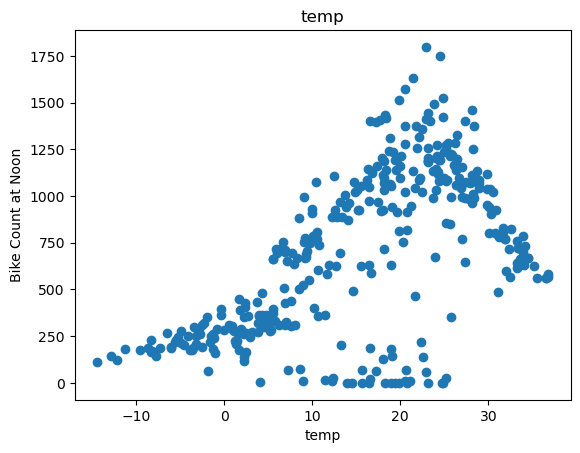

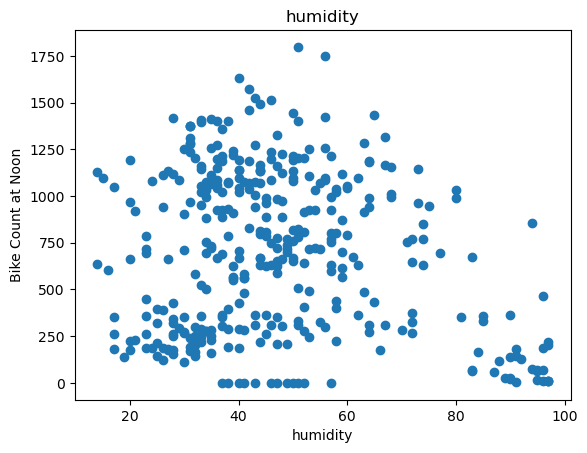

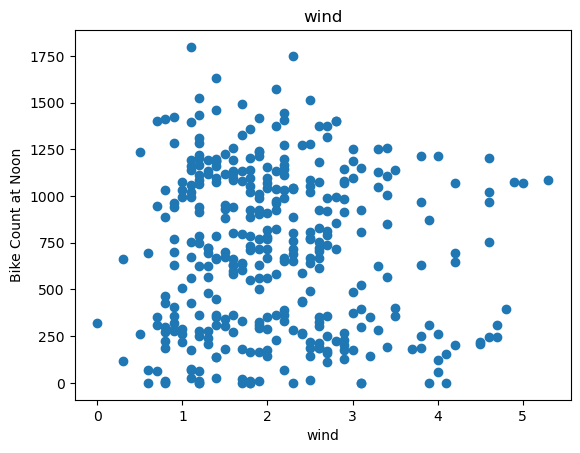

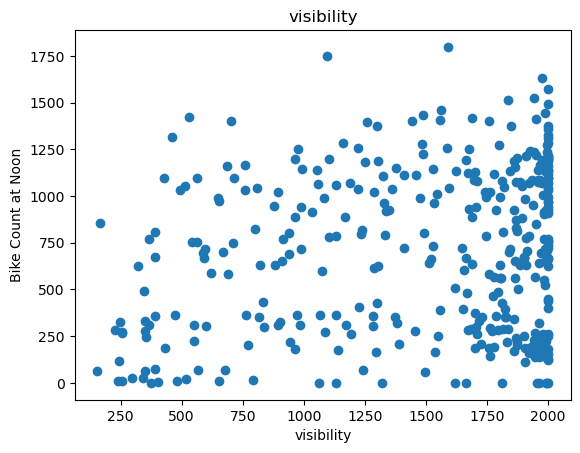

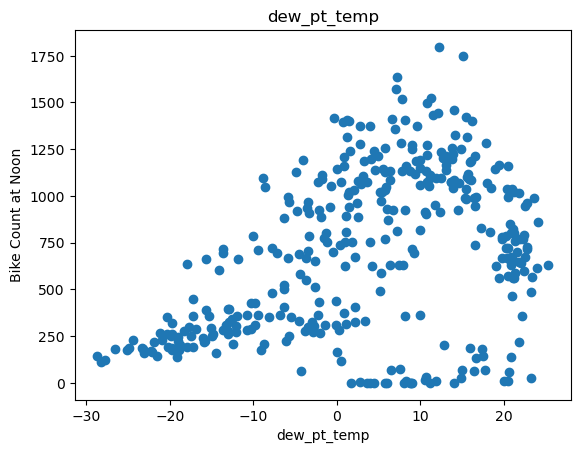

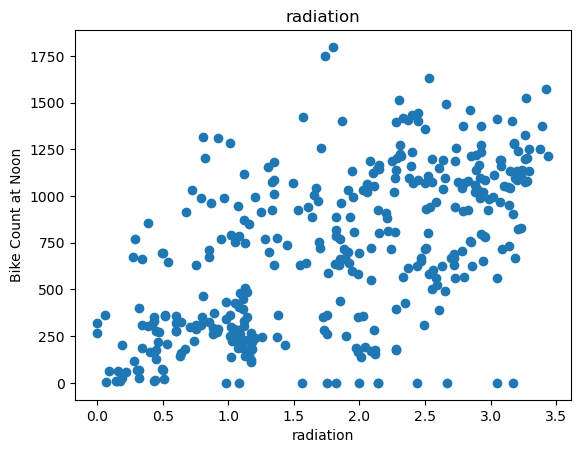

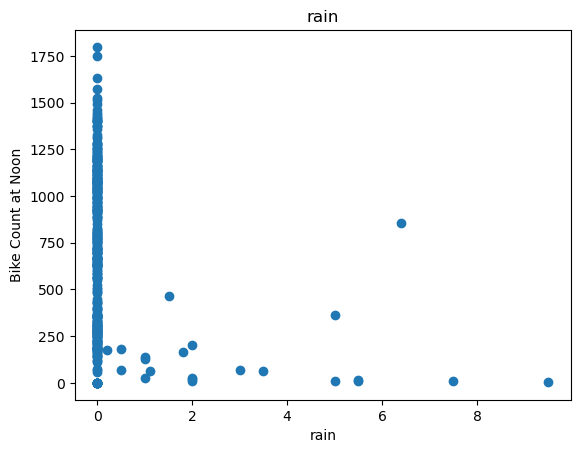

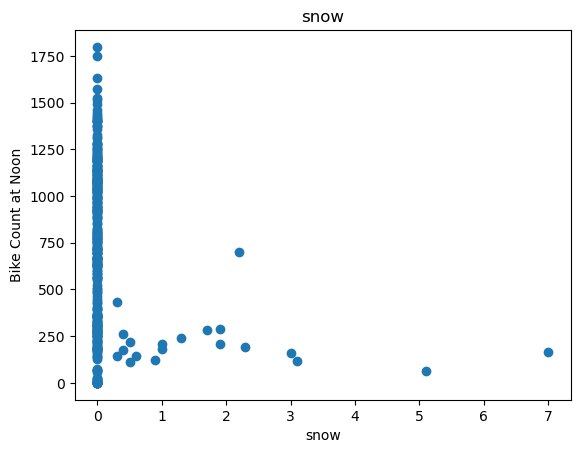

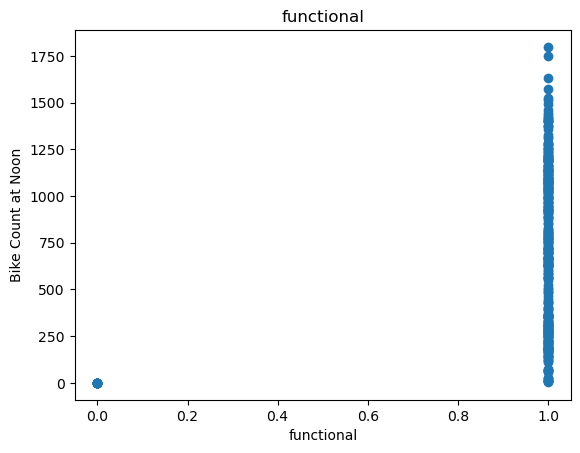

In [7]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [8]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
print

C:\Users\PAVAN\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [9]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [10]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit( X_train_temp, y_train_temp)

LinearRegression()

In [12]:
reg.score(X_train_temp, y_train_temp)

0.3418794582390612

In [13]:
reg.intercept_

array([379.74905323])

In [14]:
reg.coef_

array([[21.02849435]])

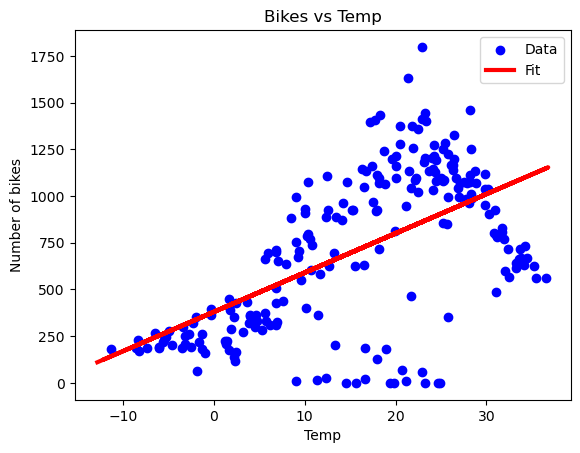

In [15]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")

plt.plot(X_test_temp, reg.predict(np.array(X_test_temp).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [16]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

C:\Users\PAVAN\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [22]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [37]:
y_pred_lr = all_reg.predict(X_test_all)

In [39]:
y_pred_lr


array([[ 492.78434518],
       [ 740.96201835],
       [1082.78617244],
       [ 836.53285184],
       [ 968.7853559 ],
       [ 947.61824779],
       [ 866.53692283],
       [ 926.59891855],
       [1158.97728845],
       [ 207.9627055 ],
       [ 554.13253274],
       [ 403.15552607],
       [ 807.51259013],
       [ 839.38644318],
       [ 977.1212482 ],
       [ 863.87849756],
       [ 598.13588695],
       [ 412.6424816 ],
       [1003.25777051],
       [ 361.89885076],
       [ 471.37951977],
       [ 553.05073192],
       [1036.46210405],
       [ 279.58774673],
       [1126.47125446],
       [ 728.70973028],
       [ 421.16014895],
       [ 404.66754859],
       [1094.65604005],
       [ 154.64525009],
       [ 418.26807386],
       [1035.71078307],
       [ 195.97192753],
       [ 877.14766427],
       [ 546.4802871 ],
       [ 275.11538581],
       [ 956.2051181 ],
       [1147.75863063],
       [ 686.8121971 ],
       [ 533.38715854],
       [ 345.24098233],
       [ 781.021